# Graded Challange 7

---

## 1. Introduction


### Name : Muhammad Irsyad Rafif

### Batch : HCK-013

### Obejective :
The objective of this project is to find out a financial headline if it is positive neutral or negative to our bussiness.


---

Problem Statement: 

I am a data science working in 420News, a jurnalistic company that focuses on online news paper and News Channel which airs 4 times a day.

i am tasked to conduct a model perdiction based on our headlines to filter out postive and negative news that will be presented by our 420News news anchors.

## 2. Import Liblaries

In [1]:
# Import Liblaries for Data Manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Liblaries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm

# Liblaries for deep learning and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from bs4 import BeautifulSoup
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape



# NLTK NLP Preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud,STOPWORDS

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
import tqdm
import unicodedata
import contractions
import string



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Irsyad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irsyad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Load Liblaries**

Before we begin the project, we have to import all the necessary liblaries that are required to run certain task in the code below.

## 3. Data Loading

In [2]:
# Define csv as df with encoding of latin-1 in order for the csv to read the file
df = pd.read_csv('all_data.csv', delimiter=',',encoding='latin-1')

# Show first 5 rows of the data
df.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


Load Data encoding of latin-1 is set in order for the csv to read the file, after loading we can see that the title is a value, we have to rename the titles appropriately.

In [3]:
# Rename Column Title
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'headline'})
# Show first 5 rows
df.head(5)

,sentiment,headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


Using rename function to rename the column with the respective title which are sentiment and headline. Immidiatly after we will show the top 5 data of out dataset.

In [4]:
# Show last 5 rows
df.tail(5)

,sentiment,headline
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


We do the same by showing the last 5 data in our table.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   headline   4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


**Data Summary**

The data only consist of 2 columns which are sentiment and headlines both of which are an object/string.

### 3.1 Missing Value Handling

**Missing Value**

Missing value will be checked ahead of time in order to improve the model and reduce errors.

In [6]:
# Show null values
df.isna().sum()

sentiment    0
headline     0
dtype: int64

There are no null values so we do not need to do any missing value handling.

### 3.2 Duplicate Value

**Duplicate Value**

Duplicate will be checked ahead of time in order to improve the model and reduce errors.

In [7]:
df.duplicated().sum()

6

There are no duplicate values in our dataset.

### 3.3 Assinging Target Feature

**Target Feature**

In this Dataset we want to know if a headline is a positive or a negative news by using the sentiment column as a target.

In [8]:
df['sentiment'].value_counts()

sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

There are 3 columns, and the variable that has the most count is the neutral column, `since we only want to know if the headline is a positive or a negative value we will drop the neutral column ahead of time.`

In [9]:
# Create a boolean mask where sentiment column is not equal to 'neutral'
mask = df['sentiment'] != 'neutral'

# Apply the mask to filter out rows where sentiment is not 'neutral'
df = df[mask]

df['sentiment'].value_counts()

sentiment
positive    1363
negative     604
Name: count, dtype: int64

Neutral label has been removed from the dataset. Leaving a total of 1967 rows in our dataset.

## 4. Exploratory Data Analysis

**Exploratory Data Analysis (EDA)**

In this section we will be looking at 2 things.

1. The graph detailing the amount of positive and negative in our target.
2. A word cloud detailing popular words that are used in our dataset.

In [10]:
# Creating a copy for df
df_copy = df

### 4.1 Target Data Analysis

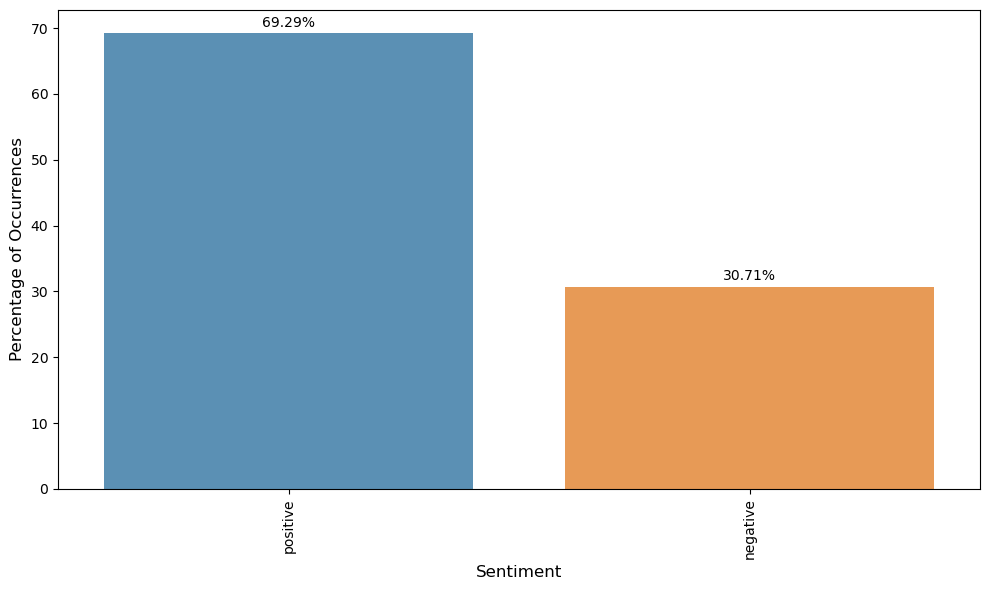

In [11]:
# Calculate the value counts of each sentiment category
sentiment_counts = df_copy['sentiment'].value_counts()

# Calculate the total number of rows
total_rows = len(df_copy)

# Calculate the percentage of each sentiment category
sentiment_percentages = (sentiment_counts / total_rows) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, alpha=0.8)
plt.ylabel('Percentage of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=90)

# Annotate the bars with the percentage values
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Check Sentiment Data (Target)**

From the bar plot above we can see that there are more postive news than there are negative news, where positive is 69.29% and 30.71% negative values. `The data is moderatly imbalanced but since we cannot duplicate negative values or remove positive value we will leave them be.`

**Note: The reason we cannot conduct balancing is because :**

**- if we oversample we will get duplicate values which we cannot use.**
**- if we undersample we will lower the already low values even further.**

### 4.2 Word Cloud

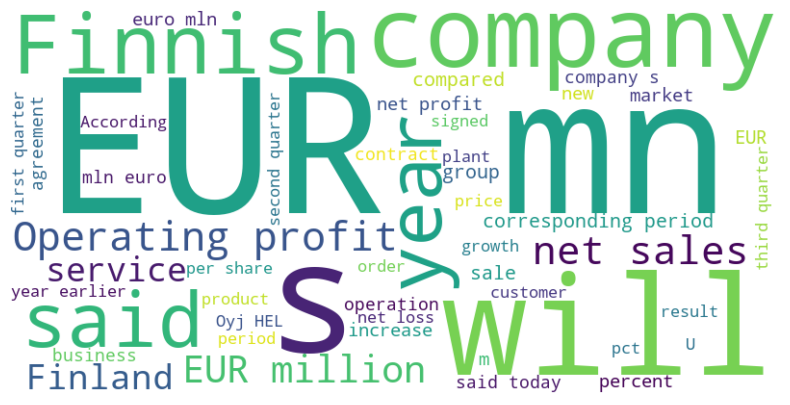

In [12]:
# Combines all tweet text into one string
all_headline_text = ' '.join(df_copy['headline'])  

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, max_words=50).generate(all_headline_text) 

# Displays WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using the wordcloud liblary we can see the top 50 words are the ones that show up the most `We can see that the words that are correlated to companies and EUR currency, and many other words like sales, year, ect`. 

There are still words that needs to be cleared such as S which is a single letter and U as well, this will be cleaned in the feature engineering section.

## 5. Feature Engineering

### 5.1 Text Preprocessing

In [17]:
# Make a function using beutifulsoup to parse and strip white space and enters
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

#  remove accented characters from text strings
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

# Using stopword liblary to remove stop words like the and or ect.
def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

**Functions explained**

The above functions are created to:
- Parse the text and  remove new lines.
- Remove Accented characters
- Remove stopword such as the, and , or, ect.

In [18]:
# Making a fucntion to run previouse functions and other symbols
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

**Function Explained**

The Function above is to combine all other functions as well as remove additional symbols and alphanumeric or whitespace characters.

In [19]:
# Run the main function to clean data text
df.headline = pre_process_corpus(df.headline)

 40%|████      | 793/1967 [00:00<00:00, 2680.61it/s]C:\Users\Irsyad\AppData\Local\Temp\ipykernel_31120\2483122278.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 1967/1967 [00:00<00:00, 2737.28it/s]


Function has been run on df.headline

In [20]:
# Show result after cleaning
df['headline']

1       international electronic industry company elco...
2       new production plant company would increase ca...
3       according company updated strategy years 20092...
4       financing aspocomp growth aspocomp aggressivel...
5       last quarter 2010 componenta net sales doubled...
                              ...                        
4839    helsinki thomson financial shares cargotec fel...
4840    london marketwatch share prices ended lower lo...
4842    operating profit fell eur 354 mn eur 688 mn 20...
4843    net sales paper segment decreased eur 2216 mn ...
4844    sales finland decreased 105 january sales outs...
Name: headline, Length: 1967, dtype: object

The above data has been sucsesfully changed with a better and cleaner data where python may interpreate it more easier than before.

### 5.2 Feature Transofmation

In [21]:
# Change Target into Number

# replace positive and negative into numbers
df['sentiment'] = df['sentiment'].replace({'negative' : 0, 'positive' : 1})

# Reset index after replacement
df.reset_index(drop=True, inplace=True)

# Show result
df

,sentiment,headline
0,0,international electronic industry company elco...
1,1,new production plant company would increase ca...
2,1,according company updated strategy years 20092...
3,1,financing aspocomp growth aspocomp aggressivel...
4,1,last quarter 2010 componenta net sales doubled...
...,...,...
1962,0,helsinki thomson financial shares cargotec fel...
1963,0,london marketwatch share prices ended lower lo...
1964,0,operating profit fell eur 354 mn eur 688 mn 20...
1965,0,net sales paper segment decreased eur 2216 mn ...


The above function is created to change `the positive and negative value into 1 and 0 respectively.`

We can also use LabelEncoder to change the value into an interger, but this is also a viable way to change the data.

## 6. Spit Train Test Val

In [22]:
# data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.headline,
                                                    df.sentiment,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.sentiment)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

# Show Data shape of Train, Test, Val
print('Train Size : ', X_train.shape)
print('Train Size : ', y_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1503,)
Train Size :  (1503,)
Val Size   :  (168,)
Test Size  :  (296,)


We will be spplitting the value into three sperate variables which are Train, test , and Val.

where Train will mostly be used to train the model, val is used to validate the train set and test will be used to test perdict the model based on the train set.

## 7. Model Building

### 7.1 Tokenizer

In [23]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

X_train_vec

<1503x5157 sparse matrix of type '<class 'numpy.int64'>'
	with 19677 stored elements in Compressed Sparse Row format>

The purpose of the code above is to obtain the vocabularies from the train test and val.

In [24]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  5157
Maximum Sentence Length :  35 tokens


Based on the countVectorizer we can see that the `total vocabulary we gather is 5157 and the maximum length of the vocabulary is 35 tokens.`

In [25]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) 

# Adapt the vectorization based on X_train
text_vectorization.adapt(X_train)

The code above is to set teh parameter of the vectorization where we will convert the string of text into an interger.

By using the max vocab and max length of the countVectorize as it's basis

In [26]:
# Vectorize model
X_train = text_vectorization(X_train)
X_test = text_vectorization(X_test)
X_val = text_vectorization(X_val)

Train, test, val will be vectorized outside of the model so we can save the file as a .h5

In [27]:
# Embedding
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Define Embedding with the parameter that is based on the count vectorize

## 8. Fit Model

In [28]:
# Create a callback to stop at the optimum epoch
callbacks= [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
]

Callback is created to stop the epoch from compleating all itteration by selecting the best result based on th callback parameters.

In [29]:
# Base Model Training using LSTM

# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define your model architecture
model_lstm_1 = Sequential()
model_lstm_1.add(embedding)  
model_lstm_1.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks)

# Display model summary
model_lstm_1.summary()


Epoch 1/50

47/47 [==============================] - 5s 26ms/step - loss: 0.6272 - accuracy: 0.6910 - val_loss: 0.6125 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 2/50
47/47 [==============================] - 1s 11ms/step - loss: 0.4433 - accuracy: 0.7906 - val_loss: 0.5714 - val_accuracy: 0.7509 - lr: 0.0010
Epoch 3/50
47/47 [==============================] - 1s 11ms/step - loss: 0.1751 - accuracy: 0.9495 - val_loss: 0.8004 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 4/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0879 - accuracy: 0.9785 - val_loss: 0.8374 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 5/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0490 - accuracy: 0.9904 - val_loss: 0.8817 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 6/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0402 - accuracy: 0.9935 - val_loss: 0.8813 - val_accuracy: 0.8019 - lr: 1.0000e-04
Epoch 7/50
47/47 [==============================] - 1s 11ms/step -

Model has been fitted with an itteratiobn of 50 epoch it has stopped at 7 epoch with a loss of 0.0363 and an accuracy of 0.9952

## 9. Model Evaluation

c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

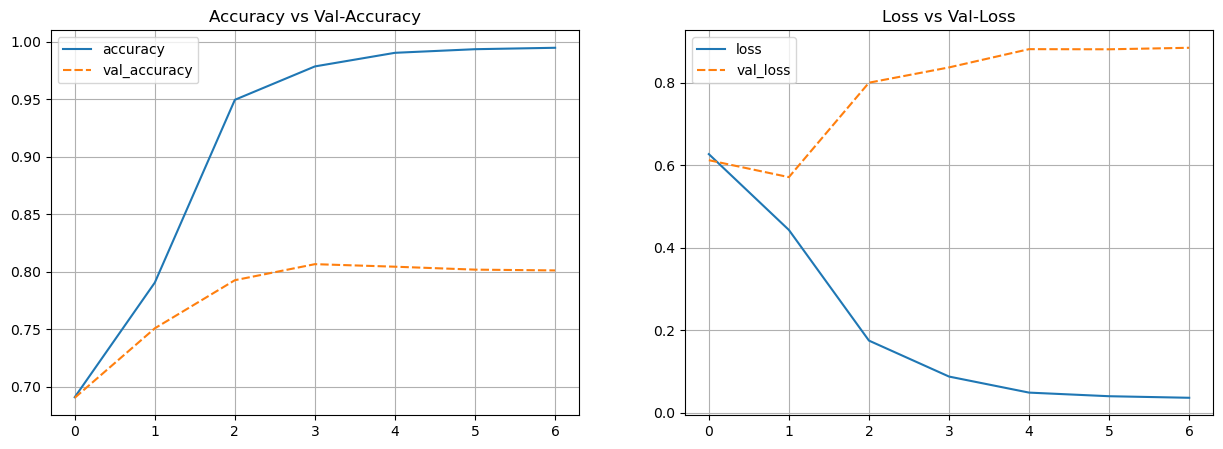

In [30]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Based on the graph at first glance we can say that the data is very overfit, we can confirm this further by showing the train accuracy/loss as well as test accuracy/loss.

In [31]:
results_train_func= model_lstm_1.evaluate(X_train,y_train, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

train_acc 0.9118903875350952
train_loss 0.24441969394683838


The accuracy and loss for train set ate 0.94 and 0.2

In [32]:
results_train_func= model_lstm_1.evaluate(X_test,y_test, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

train_acc 0.7784748673439026
train_loss 0.4897601008415222


The accuracy and loss for train set ate 0.79 and 0.48. The difference between the train and test is significantly different and the test result is more stable with a smal difference between accuracy and loss

## 10. Model Improvment

In [33]:

# Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(embedding)
model_lstm_2.add(Bidirectional(LSTM(256, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Bidirectional(LSTM(128, kernel_initializer=tf.keras.initializers.GlorotUniform(seed), return_sequences=True)))
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.055), metrics=['accuracy'])

# Fit the model
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks)

# Display summary
model_lstm_2.summary()

Epoch 1/50
47/47 [==============================] - 14s 112ms/step - loss: 0.7299 - accuracy: 0.6434 - val_loss: 0.6221 - val_accuracy: 0.6905 - lr: 0.0550
Epoch 2/50
47/47 [==============================] - 3s 62ms/step - loss: 0.6492 - accuracy: 0.6793 - val_loss: 0.6210 - val_accuracy: 0.6905 - lr: 0.0550
Epoch 3/50
47/47 [==============================] - 3s 63ms/step - loss: 0.6284 - accuracy: 0.6800 - val_loss: 0.6520 - val_accuracy: 0.6905 - lr: 0.0550
Epoch 4/50
47/47 [==============================] - 3s 61ms/step - loss: 0.6162 - accuracy: 0.6687 - val_loss: 0.6883 - val_accuracy: 0.6905 - lr: 0.0550
Epoch 5/50
47/47 [==============================] - 3s 58ms/step - loss: 0.5982 - accuracy: 0.6919 - val_loss: 0.6360 - val_accuracy: 0.6905 - lr: 0.0055
Epoch 6/50
47/47 [==============================] - 3s 54ms/step - loss: 0.5761 - accuracy: 0.6913 - val_loss: 0.6358 - val_accuracy: 0.6905 - lr: 0.0055
Epoch 7/50
47/47 [==============================] - 3s 56ms/step - loss: 0

In This section we are trying to improve the base model by adding more hidden layers, adding dropouts and changing the unit variable from 256, 128, and 64 as well as adding a learnign rate of around 0.055.

After running fitting the model we can see that it has stopped at 8 epoch by the callback with an loss of 0.33 and a accuracy of 0.85, we will check the graph after fitting of the improved model.

c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

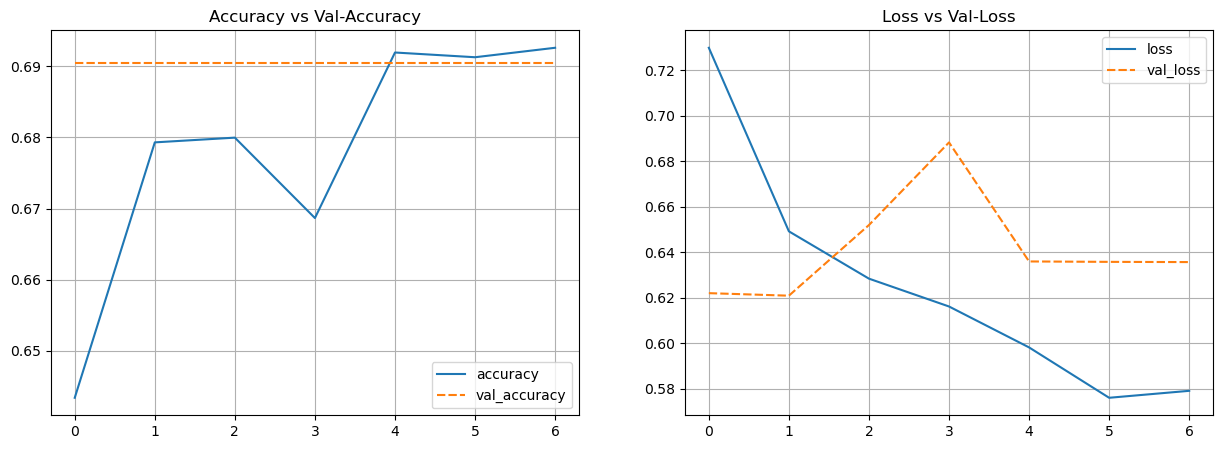

In [34]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Based on the graph above we can see that the model is still overfit despite the added features, we will see accuracy and loss for the train and test as well below.

In [35]:
results_train_func= model_lstm_2.evaluate(X_train,y_train, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

train_acc 0.6932801008224487
train_loss 0.6001708507537842


In [36]:
results_train_func= model_lstm_2.evaluate(X_test,y_test, verbose=0)
print('train_acc', results_train_func[1])
print('train_loss', results_train_func[0])

train_acc 0.6925675868988037
train_loss 0.6178567409515381


Based on the accuracy and loss of the train and test we can see that the accuracy of the test set is slightly lower by 0.1 while the loss increased of around 0.11.

even if this still can be improved further by either adding or removing hidden layers or using normalization. we will use this as this is still a decent result in our model evaluation.

**Conclusion**

We can conclude that since the improved model has a better accuracy score we can safely say that the improved model will be used for model inference.

## 11. Saving Model

In [37]:

# Save model with h5 format
model_lstm_2.save('model_func.h5')

c:\Users\Irsyad\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Improved model, is chosen as the optimum model for this program thus will be saved using .keras as the file extension

## 12. Model Inference

### 12.1 Model Loading

In [38]:
load_model_func= tf.keras.models.load_model('model_func.h5')

Model has been sucsesfully loaded

In [39]:
# Create new data for model inference
new_data = {
    'headline': ['According to Nijisanji, many talents has been laid off due to the decreasing stock and shareholders .', "Elon Musk has stated that Tesla has became the top-selling car company in Norway"]
}

# Specify an index, for example:
index = ['1','2']

# Convert new data into a new dataframe
new_df = pd.DataFrame(new_data, index=index)
# Show data frame
new_df


,headline
1,"According to Nijisanji, many talents has been ..."
2,Elon Musk has stated that Tesla has became the...


New data frame for model inference has been sucsesfully loaded with a `negative value in the first row and a positive value in the second row.`

In [40]:
# Clean data before perdiction
new_df.headline = pre_process_corpus(new_df.headline)

100%|██████████| 2/2 [00:00<00:00, 1927.53it/s]


Data will be cleaned using the pre_process_corpus function before going into perdiction to improve the perdicted results.

In [41]:
# Vectorize the text data in new_df
new_df_vectorized = text_vectorization(np.array(new_df['headline']))  # Assuming 'text_column' is the column containing text data

# Perform inference using the model
results_inference = load_model_func.predict(new_df_vectorized)

1/1 [==============================] - 2s 2s/step


In [42]:
# Show perdicted result
results_inference

array([[0.68273616],
       [0.7867676 ]], dtype=float32)

Based ont the result of the perdiction we can see that the the negative has a value of 0.69 while the positive value is 0.95.


with this information we can `set a threshold of the result to be around 0.7. where anything above 0.7 is a negative (0) and bellow 0.7 is a positive (1)`

In [49]:
# Set Threshold
pred_inf_th070= tf.where(results_inference >0.70, 1,0)

# Show result after thersholding
pred_inf_th070

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[0],
       [1]])>

We can see tha the first for has become 0 which means negative and the second row is 1 which means positive

In [50]:
new_df['predicted']=pred_inf_th070
new_df

,headline,predicted
1,according nijisanji many talents laid due decr...,0
2,elon musk stated tesla became topselling car c...,1


Result of the perdiciton is quite accurate perdicting both positive and negative headlines correctly.

## 13. Conclusion

Based on the program we can conclude that:

Model:
- The base model with no dropout or more hidden values is very overfit comapared to the improved model.
- After improvment the data still shows questionable results with a low pretty low accuracy and a higher loss.


Model Improvement:
- Further improvement could be done to increase the model quality:
  - Data is imbalanced thus potential balancing by adding more negative headline may lead to an improvement in the model.
  - Adding a new hidden layer and changing each parameters.
  - changing optimizer to use other then Adam.
  - Use functional model instead of sequential model to have more flexibility.
  - Adjust the learning rate further.

###  Overall Analysis

Based on the evalaution of both model, we can deduce that the improved model performs better compared to the base model, with a higher accuracy and a lower loss in the test set. Although the model perdicted well during model inference we can still improve the model further by doing the sugessted steps above, the most urgent step we need to conduct is the data balancing where out current data is still imbalanced. Some of those steps has been done such has adding hidden layers and dropouts. The data still shows to be overfitting. Understanding these factors further we can improve the model even more than it currently is.

- Bussines Insight: 
any bussines insight we can gather as a data science in a news company, we can filter out potential negative news and use postive news that we can give to the news anchors to tell to the audience, with a positive news may lead to higher viewer rentention.